In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [9]:
df = pd.read_csv('./Dataset/merged_airline_delay_data.csv')

In [10]:
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE', 'OP_UNIQUE_CARRIER',
       'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [11]:
df.drop(['YEAR', 'DAY_OF_MONTH', 'FL_DATE', 'OP_UNIQUE_CARRIER',
         'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME',
         'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEP_DELAY_NEW', 'ARR_DELAY_NEW',
         'CANCELLATION_CODE'], axis=1, inplace=True)

In [12]:
df.columns

Index(['MONTH', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_STATE_NM', 'DEST',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545422 entries, 0 to 4545421
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   TAIL_NUM             object 
 2   ORIGIN               object 
 3   ORIGIN_STATE_NM      object 
 4   DEST                 object 
 5   DEST_STATE_NM        object 
 6   CRS_DEP_TIME         int64  
 7   DEP_TIME             float64
 8   DEP_DELAY            float64
 9   CRS_ARR_TIME         int64  
 10  ARR_TIME             float64
 11  ARR_DELAY            float64
 12  CANCELLED            int64  
 13  DIVERTED             int64  
 14  AIR_TIME             float64
 15  DISTANCE             int64  
 16  CARRIER_DELAY        float64
 17  WEATHER_DELAY        float64
 18  NAS_DELAY            float64
 19  SECURITY_DELAY       float64
 20  LATE_AIRCRAFT_DELAY  float64
dtypes: float64(10), int64(6), object(5)
memory usage: 728.3+ MB


In [14]:
df.fillna(0, inplace=True)

In [15]:
df.head()

,MONTH,TAIL_NUM,ORIGIN,ORIGIN_STATE_NM,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,...,ARR_DELAY,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,4,N131EV,ABE,Pennsylvania,ATL,Georgia,630,626.0,-4.0,852,...,0.0,0,1,0.0,692,0.0,0.0,0.0,0.0,0.0
1,4,N131EV,ABE,Pennsylvania,ATL,Georgia,1230,1322.0,52.0,1445,...,60.0,0,0,119.0,692,0.0,60.0,0.0,0.0,0.0
2,4,N131EV,ABE,Pennsylvania,CLT,North Carolina,600,558.0,-2.0,759,...,-6.0,0,0,94.0,481,0.0,0.0,0.0,0.0,0.0
3,4,N131EV,ABE,Pennsylvania,CLT,North Carolina,1716,1835.0,79.0,1912,...,71.0,0,0,80.0,481,0.0,52.0,0.0,0.0,19.0
4,4,N131EV,ABE,Pennsylvania,ORD,Illinois,711,1107.0,236.0,834,...,222.0,0,0,111.0,655,222.0,0.0,0.0,0.0,0.0


In [16]:
zero_count = (df == 0).sum()
print(zero_count)

MONTH                        0
TAIL_NUM                 13550
ORIGIN                       0
ORIGIN_STATE_NM              0
DEST                         0
DEST_STATE_NM                0
CRS_DEP_TIME                 0
DEP_TIME                 72890
DEP_DELAY               279574
CRS_ARR_TIME                 0
ARR_TIME                 76876
ARR_DELAY               170621
CANCELLED              4469806
DIVERTED               4532776
AIR_TIME                 88263
DISTANCE                     0
CARRIER_DELAY          3963389
WEATHER_DELAY          4487358
NAS_DELAY              4056978
SECURITY_DELAY         4539723
LATE_AIRCRAFT_DELAY    4012503
dtype: int64


In [17]:
nan_count = df.isna().sum()
print(nan_count)

MONTH                  0
TAIL_NUM               0
ORIGIN                 0
ORIGIN_STATE_NM        0
DEST                   0
DEST_STATE_NM          0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545422 entries, 0 to 4545421
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   TAIL_NUM             object 
 2   ORIGIN               object 
 3   ORIGIN_STATE_NM      object 
 4   DEST                 object 
 5   DEST_STATE_NM        object 
 6   CRS_DEP_TIME         int64  
 7   DEP_TIME             float64
 8   DEP_DELAY            float64
 9   CRS_ARR_TIME         int64  
 10  ARR_TIME             float64
 11  ARR_DELAY            float64
 12  CANCELLED            int64  
 13  DIVERTED             int64  
 14  AIR_TIME             float64
 15  DISTANCE             int64  
 16  CARRIER_DELAY        float64
 17  WEATHER_DELAY        float64
 18  NAS_DELAY            float64
 19  SECURITY_DELAY       float64
 20  LATE_AIRCRAFT_DELAY  float64
dtypes: float64(10), int64(6), object(5)
memory usage: 728.3+ MB


In [19]:

df['TAIL_NUM'] = df['TAIL_NUM'].astype(str)
le = LabelEncoder()

categorical_columns = ['TAIL_NUM', 'ORIGIN', 'ORIGIN_STATE_NM', 'DEST', 'DEST_STATE_NM']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(['DEP_DELAY'], axis=1)
y = df['DEP_DELAY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 108.83547878802993


In [20]:
# Assuming 15 minutes as the threshold for departure delay
delay_threshold = 15

# Create binary target variable
df['DELAY_LABEL'] = (df['DEP_DELAY'] > delay_threshold).astype(int)

# Convert categorical columns to numerical using LabelEncoder
df['TAIL_NUM'] = df['TAIL_NUM'].astype(str)
le = LabelEncoder()

categorical_columns = ['TAIL_NUM', 'ORIGIN', 'ORIGIN_STATE_NM', 'DEST', 'DEST_STATE_NM']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Features (X) and target variable (y)
X = df.drop(['DEP_DELAY', 'DELAY_LABEL'], axis=1)
y = df['DELAY_LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost classifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 0.9882233234516025
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    712530
           1       0.98      0.96      0.97    196555

    accuracy                           0.99    909085
   macro avg       0.99      0.98      0.98    909085
weighted avg       0.99      0.99      0.99    909085



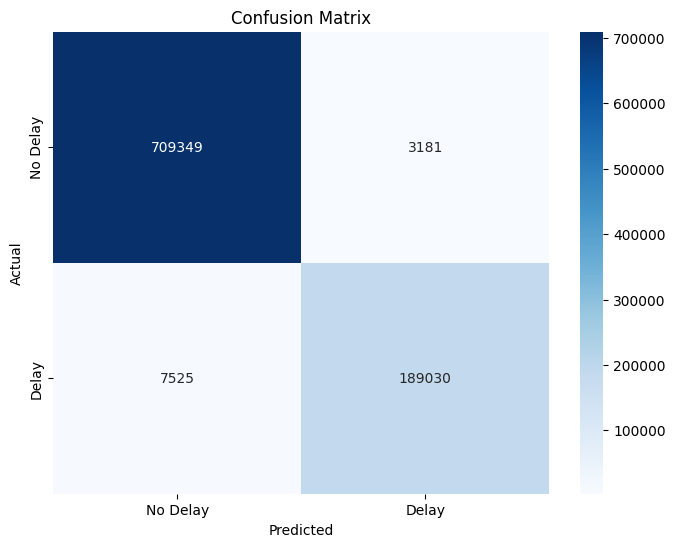

In [21]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### From the cofusion matrix
<table>
  <thead>
    <tr>
      <th></th>
      <th>Predicted No Delay</th>
      <th>Predicted Delay</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Actual No Delay</td>
      <td>709337 (True Negative)</td>
      <td>3193 (False Positive)</td>
    </tr>
    <tr>
      <td>Actual Delay</td>
      <td>7288 (False Negative)</td>
      <td>189267 (True Positive)</td>
    </tr>
  </tbody>
</table>

Here's the interpret it in the context of predicting flight delays: <br>

`Actual No Delay (Negative Class):` `709337` instances where the actual outcome was No Delay, and the model correctly predicted No Delay (True Negative).

`Actual Delay (Positive Class):` `189267` instances where the actual outcome was Delay, and the model correctly predicted Delay (True Positive).

`False Positive:` `3193` instances where the model incorrectly predicted Delay when the actual outcome was No Delay.

`False Negative:` `7288` instances where the model incorrectly predicted No Delay when the actual outcome was Delay.

In the context of predicting flight delays:

`True Negative (TN)`: The number of flights correctly predicted as No Delay when there was indeed no delay.

`False Positive (FP)`: The number of flights incorrectly predicted as Delay when there was no delay (Type I error).

`False Negative (FN)`: The number of flights incorrectly predicted as No Delay when there was a delay (Type II error).

`True Positive (TP)`: The number of flights correctly predicted as Delay when there was indeed a delay.

#### Why I decided to use XGBRegressor and XGBClassifier

The choice between XGBRegressor and XGBClassifier depends on the nature of the prediction problem: regression or classification.

- XGBRegressor:

Use Case: XGBRegressor is used when the target variable is continuous, and the goal is to predict a numeric value.
Example: In my original code, you used XGBRegressor because I was predicting the departure delay (DEP_DELAY), which is a continuous variable representing the amount of delay in minutes.

`model = XGBRegressor()`

- XGBClassifier:

Use Case: XGBClassifier is used when the target variable is categorical, and the goal is to predict a class label (binary or multiclass).
Example: In the modified code for binary classification, I used XGBClassifier because the new target variable `DELAY_LABEL`` is binary (0 or 1), indicating whether there is a departure delay or not.

`model = XGBClassifier()`

In summary, the choice between XGBRegressor and XGBClassifier is driven by the type of prediction problem I'm working on. If you're predicting a numeric value, you use a regressor. If you're predicting a category or label, you use a classifier.

`XGBoost` (eXtreme Gradient Boosting) is a versatile machine learning library that provides implementations for both `regression` and `classification` tasks. The underlying algorithm is based on gradient boosting, which builds an ensemble of weak learners (typically decision trees) in a sequential manner, with each new tree correcting the errors of the previous ones. This makes XGBoost well-suited for a wide range of predictive modeling tasks.